## **CNN with CIFAR-10 Data**

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt    
%matplotlib inline

In [2]:
np.set_printoptions(suppress=True)

In [83]:
print(tf.__version__)

2.8.0


In [84]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [85]:
tf.config.list_physical_devices('GPU')

[]

In [ ]:
# Release GPU memory to prevent memory-leaks.
from numba import cuda
device = cuda.get_current_device()
device.reset()

In [87]:
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
from tensorflow.keras.datasets import cifar10
 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  50000 images in the training dataset
There are  10000 images in the test dataset


In [6]:
# Checking the shape of one image
X_train[5].shape

(32, 32, 3)

In [7]:
X_train[5]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

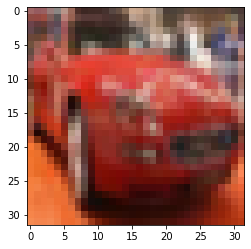

In [8]:
plt.imshow(X_train[5])
# plt.matshow(X_train[5])

In [9]:
y_train[5]

array([1], dtype=uint8)

In [10]:
y_train.shape

(50000, 1)

In [11]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

**Class names:**

- 0: Airplane
- 1: Automobile
- 2: Bird
- 3: Cat
- 4: Deer
- 5: Dog
- 6: Frog
- 7: Horse
- 8: Ship
- 9: Truck

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [13]:
classes[int(y_train[0])]

'frog'

In [14]:
int(np.random.randint(low=0, high=50000, size=1))

19983

In [15]:
X_train[int(np.random.randint(low=0, high=50000, size=1))]

array([[[103, 100,  69],
        [109, 106,  75],
        [115, 112,  81],
        ...,
        [114, 110,  82],
        [108, 104,  77],
        [104, 100,  73]],

       [[105, 102,  70],
        [111, 108,  77],
        [117, 114,  83],
        ...,
        [115, 111,  84],
        [110, 106,  79],
        [106, 102,  75]],

       [[109, 106,  74],
        [113, 110,  79],
        [119, 116,  85],
        ...,
        [118, 114,  87],
        [114, 110,  83],
        [108, 104,  77]],

       ...,

       [[225, 213, 175],
        [226, 214, 176],
        [230, 219, 180],
        ...,
        [221, 209, 171],
        [215, 203, 165],
        [210, 198, 160]],

       [[227, 214, 176],
        [228, 216, 178],
        [232, 220, 182],
        ...,
        [221, 210, 172],
        [216, 204, 166],
        [211, 199, 161]],

       [[228, 216, 178],
        [230, 218, 180],
        [234, 222, 184],
        ...,
        [224, 213, 174],
        [219, 207, 169],
        [214, 202, 164]]

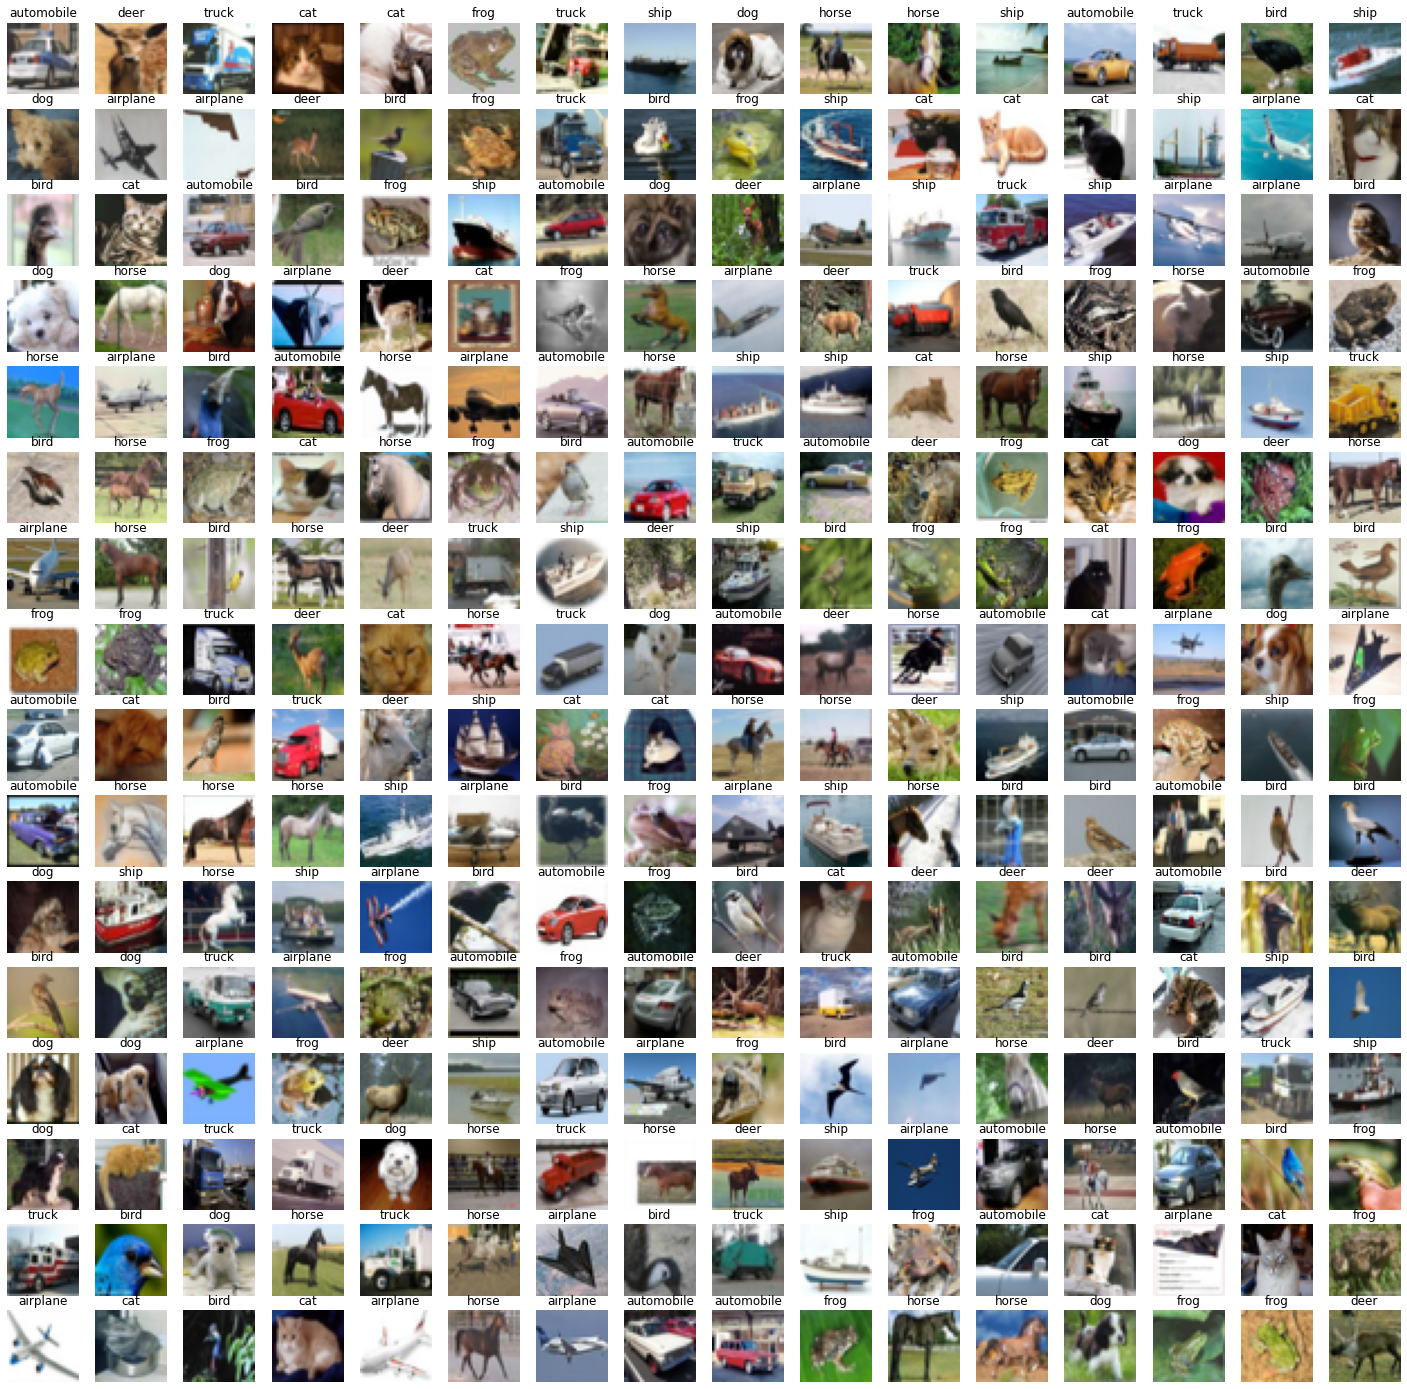

In [100]:
plt.figure(figsize=(25, 25))
for i in range(256):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(16, 16, i+1, label=classes[int(y_train[rand_index])])
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])    

## Data Preprocessing

In [16]:
X_train[5].min()

0

In [17]:
X_train[5].max()

252

In [18]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [19]:
X_train[5].min()

0.0

In [20]:
X_train[5].max()

0.9882353

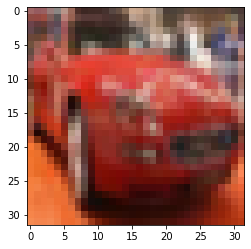

In [21]:
plt.imshow(X_train[5])

In [22]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [23]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [24]:
from tensorflow.keras.utils import to_categorical

In [25]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

#### Dropout layer extra info

[External link to the keras documentation about dropout layers. An important read!](https://keras.io/api/layers/regularization_layers/dropout/)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [28]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu', padding='same'))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [33]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 146s 93ms/step - loss: 1.3884 - accuracy: 0.4969 - val_loss: 1.1233 - val_accuracy: 0.5990
Epoch 2/50
1563/1563 [==============================] - 147s 94ms/step - loss: 0.9659 - accuracy: 0.6604 - val_loss: 0.9048 - val_accuracy: 0.6861
Epoch 3/50
1563/1563 [==============================] - 142s 91ms/step - loss: 0.8079 - accuracy: 0.7166 - val_loss: 0.8495 - val_accuracy: 0.7056
Epoch 4/50
1563/1563 [==============================] - 139s 89ms/step - loss: 0.7096 - accuracy: 0.7505 - val_loss: 0.9349 - val_accuracy: 0.6852
Epoch 5/50
1563/1563 [==============================] - 137s 88ms/step - loss: 0.6315 - accuracy: 0.7769 - val_loss: 0.8314 - val_accuracy: 0.7163
Epoch 6/50
1563/1563 [==============================] - 133s 85ms/step - loss: 0.5553 - accuracy: 0.8028 - val_loss: 0.8480 - val_accuracy: 0.7198
Epoch 7/50
1563/1563 [==============================] - 133s 85ms/step - loss: 0.4920 - accuracy: 0.8258 - val_loss: 0

In [34]:
model.metrics_names

['loss', 'accuracy']

In [35]:
model.history.history

{'loss': [1.388403296470642,
  0.9659194350242615,
  0.8079415559768677,
  0.7096169590950012,
  0.6315382719039917,
  0.5552648305892944,
  0.4920080006122589,
  0.4334029257297516,
  0.3777918815612793,
  0.32650139927864075],
 'accuracy': [0.4968799948692322,
  0.6604200005531311,
  0.7166200280189514,
  0.7505199909210205,
  0.7768999934196472,
  0.8027600049972534,
  0.8258000016212463,
  0.8444600105285645,
  0.8646000027656555,
  0.8834199905395508],
 'val_loss': [1.123291254043579,
  0.9047738313674927,
  0.8494985103607178,
  0.9348600506782532,
  0.8313511610031128,
  0.8480297923088074,
  0.9083801507949829,
  0.9318604469299316,
  0.9527846574783325,
  1.0816346406936646],
 'val_accuracy': [0.5989999771118164,
  0.6861000061035156,
  0.7056000232696533,
  0.6851999759674072,
  0.7163000106811523,
  0.7197999954223633,
  0.7110000252723694,
  0.7110000252723694,
  0.7214999794960022,
  0.7124000191688538]}

In [36]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.388403,0.49688,1.123291,0.5990
1,0.965919,0.66042,0.904774,0.6861
2,0.807942,0.71662,0.849499,0.7056
3,0.709617,0.75052,0.934860,0.6852
4,0.631538,0.77690,0.831351,0.7163


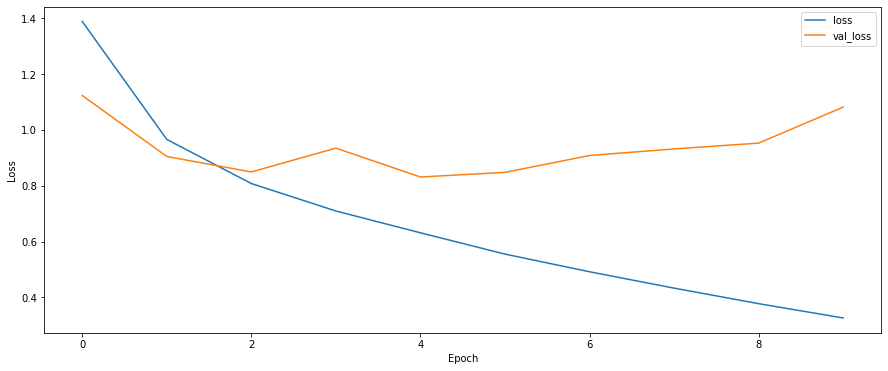

In [37]:
plt.figure(figsize=(15, 6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

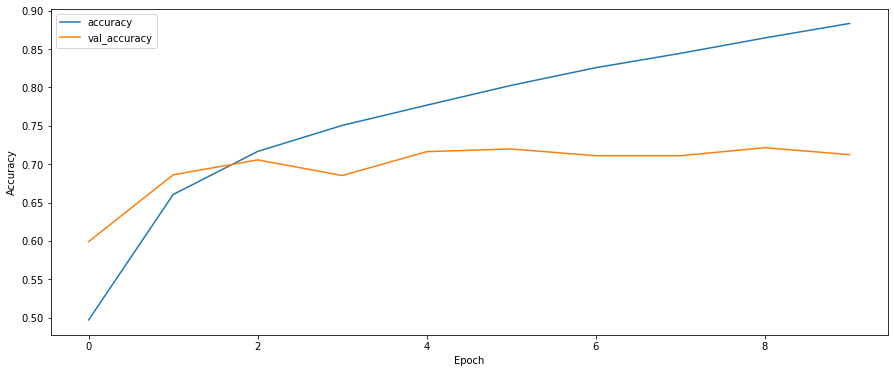

In [38]:
plt.figure(figsize=(15, 6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [39]:
print(model.evaluate(X_test, Y_test, verbose=1))

313/313 [==============================] - 4s 14ms/step - loss: 1.0816 - accuracy: 0.7124
[1.0816346406936646, 0.7124000191688538]


In [40]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

In [41]:
preds = model.predict(X_test)


In [42]:
predictions = np.argmax(preds, axis=1)

In [43]:
predictions

array([3, 8, 8, ..., 5, 4, 7], dtype=int64)

In [44]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.71      0.75      1000
           1       0.94      0.72      0.81      1000
           2       0.53      0.70      0.60      1000
           3       0.53      0.51      0.52      1000
           4       0.67      0.72      0.69      1000
           5       0.67      0.57      0.62      1000
           6       0.75      0.78      0.77      1000
           7       0.80      0.73      0.76      1000
           8       0.76      0.88      0.81      1000
           9       0.81      0.80      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



In [45]:
print(confusion_matrix(y_test, predictions))

[[715   6  93  18  24   3  15  15  79  32]
 [ 25 720  14  19   5   2   9   4  80 122]
 [ 41   1 702  44  87  38  45  24  12   6]
 [ 13   2 122 506  73 137  89  37  16   5]
 [ 14   1  92  58 719  23  43  38  12   0]
 [  9   0 118 179  37 571  33  42   7   4]
 [  2   3  88  55  40  14 781   4  12   1]
 [ 15   1  56  36  77  59  14 732   6   4]
 [ 34   8  27  20  10   1   5   3 879  13]
 [ 43  26  22  22   7   5   3  18  55 799]]


In [46]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0816346406936646
Test accuracy: 0.7124000191688538


In [47]:
my_image = X_test[44]

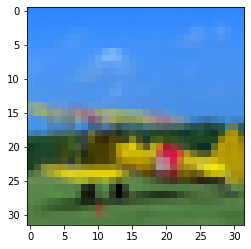

In [48]:
plt.imshow(my_image)

In [49]:
image_prediction = model.predict(my_image.reshape(1,32,32,3))

In [50]:
image_prediction

array([[0.9761143 , 0.00007181, 0.00013715, 0.00000001, 0.00001418,
        0.        , 0.        , 0.        , 0.00019269, 0.02346983]],
      dtype=float32)

In [51]:
np.argmax(image_prediction, axis=1)

array([0], dtype=int64)

In [52]:
result=np.argmax(image_prediction, axis=1)

In [53]:
result

array([0], dtype=int64)

In [54]:
classes[int(result)]

'airplane'

In [ ]:
#model.save("cnn-1.h5")

In [55]:
early_stop = EarlyStopping(monitor='val_loss', patience=15)

In [56]:
model= Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3), padding='same'))
        
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
    
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
        
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/100
1563/1563 [==============================] - 159s 101ms/step - loss: 1.3873 - accuracy: 0.4986 - val_loss: 1.0395 - val_accuracy: 0.6365
Epoch 2/100
1563/1563 [==============================] - 164s 105ms/step - loss: 0.9781 - accuracy: 0.6561 - val_loss: 0.8695 - val_accuracy: 0.6989
Epoch 3/100
1563/1563 [==============================] - 167s 107ms/step - loss: 0.8323 - accuracy: 0.7045 - val_loss: 0.7924 - val_accuracy: 0.7314
Epoch 4/100
1563/1563 [==============================] - 171s 109ms/step - loss: 0.7390 - accuracy: 0.7393 - val_loss: 0.7459 - val_accuracy: 0.7440
Epoch 5/100
1563/1563 [==============================] - 169s 108ms/step - loss: 0.6684 - accuracy: 0.7621 - val_loss: 0.7091 - val_accuracy: 0.7537
Epoch 6/100
1563/1563 [==============================] - 165s 106ms/step - loss: 0.6121 - accuracy: 0.7846 - val_loss: 0.7011 - val_accuracy: 0.7617
Epoch 7/100
1563/1563 [==============================] - 168s 107ms/step - loss: 0.5514 - accuracy: 0.8069

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
preds = model.predict(X_test)
predictions= np.argmax(preds, axis=1)

In [ ]:
print(classification_report(y_test, predictions))

In [ ]:
print(confusion_matrix(y_test, predictions))

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [ ]:
from tensorflow.keras.layers import BatchNormalization

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=10)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test,Y_test), callbacks=[early_stop])

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
preds = model.predict(X_test)
predictions= np.argmax(preds, axis=1)

In [ ]:
print(classification_report(y_test, predictions))